## Prediction using Supervised Machine Learning

#### Libraries used

In [28]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

#### Importing Data

In [29]:
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)

In [30]:
s_data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


#### Let us view Scatter Plot of both the given variables to see the relationship between them

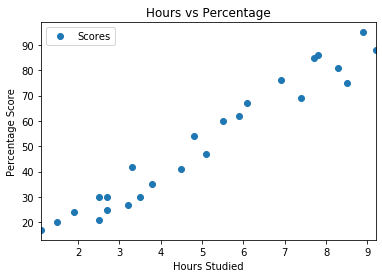

In [31]:
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

##### We can say that both the variables are positively correlated to one another. Also a linear relationship exists between them.

#### In DataFrame s_data, let Hours variable be the independent variable (X) and Scores variable be the Dependent variable (Y)

In [32]:
X = s_data.iloc[:, :-1].values  
Y = s_data.iloc[:, 1].values

### Splitting the Data into Testing and Training sets

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)

### Using Linear Regression Model

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
regressor = LinearRegression()  
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##### Regression Line

In [37]:
line = regressor.coef_*X+regressor.intercept_

#### Test Data

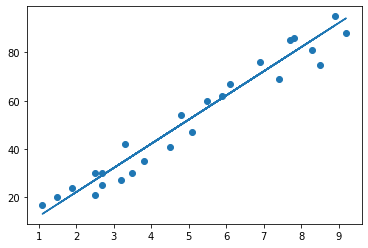

In [38]:
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

### Prediction

In [39]:
print(X_test)

[[5.5]
 [2.5]
 [3.2]
 [8.5]
 [5.1]]


In [40]:
Y_pred = regressor.predict(X_test)

#### Comparison of Actual v/s Predicted DataFrame

In [41]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
df

,Actual,Predicted
0,60,57.155166
1,30,27.122537
2,27,34.130151
3,75,87.187796
4,47,53.150816


## What will be predicted score if a student studies for 9.25 hrs/ day?

In [42]:
hours = np.array([[9.25]])
own_pred = regressor.predict(hours)
print("Predicted Score = {}".format(own_pred[0]))

Predicted Score = 94.69595283072871


## If a student studies for 9.25 hours each day, Linear Regression prediction says that student will score 94.7%

#### Model Evaluation

In [43]:
from sklearn import metrics

In [44]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))

Mean Absolute Error: 6.238211689278153
